# [실습] Wavve 데이터를 활용한 파이썬 데이터 분석

---

지금부터는 SK Wavve 고객 데이터를 활용한 파이썬 데이터 분석 과정을 체험해보겠습니다.

이 자료는 파이썬이 데이터 분석을 위해 어떻게 사용되는지를 체험하기 위한 목적으로, 자료의 내용이 완벽히 이해되지 않으셔도 괜찮습니다. :) 

코드를 따라쳐보시며 파이썬을 활용하여 어떻게 데이터 분석이 진행되는지 확인해보세요!

본격적인 데이터 분석 이전, 먼저 활용할 Wavve 데이터에 대해 알아보겠습니다.  아래 6가지 파일로 이루어져있습니다. 

|파일명|내용|
|:---|:---|
|bookmark_revised.csv |Wavve 시스템에서 발생한 컨텐츠 시청 기록|
|coin.csv|이용권 구매 기록|
|column_code_info.xlsx|각 데이터 정보가 기록된 파일|
|content_info.csv|Wavve 시스템에 존재하는 **영화가 아닌 컨텐츠** 정보를 기록|
|movie_info.csv|Wavve 시스템에 존재하는 **영화 컨텐츠** 정보를 기록|
|service_revised.csv|사용자의 서비스 가입 관련 정보를 기록|



1. `bookmark_revised.csv`
- 어떤 사용자가 어떤 프로그램을 어떤 기기로 시청했는지 등을 기록



2. `coin.csv`

- 어떤 사용자가 어떤 이용권을 언제 얼마큼 구매했는지를 기록
    - 한달 이용권이나, 포인트(Wavve 시스템 상에선 코인) 충전 등이 모두 기록됨
    - **언제**와 관련된 부분은 개인을 특정할 수 있기에 시각을 초단위가 아닌 시간 단위로 제공
    
    
3. `column_code_info.xlsx`


4. `content_info.csv` 

- 컨텐츠 제목, 컨텐츠 재생 시간(초단위), 줄거리 요약 등이 기록됨
- 만약 시리즈로 존재하는 컨텐츠(드라마, TV 애니메이션 등)라면 각 방영 회차별로 기록되어 있음
    - 즉, 특정 드라마의 제1화와 제2화는 서로 다른 컨텐츠 ID를 부여받음
5. `movie_info.csv` 
- 4번 항목과 비슷하나, 감독, 출연 배우, 시청 연령, 영문 제목 등이 추가되었으며 재생 시간 또한 분단위

6. `service_revised.csv`
- 사용권 등록일, 만기일, 사용권 정보, 결제에 사용한 기기, 사용자의 성별, 연령 정보 등이 기록되어 있음


데이터 분석 진행 전에는, 이와 같이 우리가 분석하려는 데이터에 대한 이해가 필요합니다. 

어떠한 내용으로 분석될지 고민해보며, 아래 첫 번째 셀부터 시작해주세요!



### 데이터 분석을 위한 파이썬 라이브러리

파이썬에는 대표적인 데이터 분석 라이브러리인 pandas, matplotlib, seaborn이 있습니다. 

- pandas : 데이터 조작 및 분석을 위한 파이썬 라이브러리입니다. 특히 DataFrame이라는 데이터 구조와 다양한 처리 연산을 제공하고 있습니다.
- matplotlib : 데이터 시각화(그래프 출력)을 위한 파이썬 라이브러리입니다. 각각의 함수를 사용해서 간편하게 그래프를 만들 수 있습니다.
- seaborn : matplotlib와 동일한 데이터 시각화를 위한 파이썬 라이브러리입니다. matplotlib 대비 손쉽게 그래프를 그리고 그래프 스타일 설정을 할 수 있다는 장점을 가졌습니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

In [2]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [3]:
# 한글 폰트 설정
plt.rcParams['font.family'] = "NanumBarunGothic"

## 컬럼 정보 조회

**<font color='blue'>Tips.</font>** **컬럼(column)** 이란, 데이터의 각 열을 의미합니다. 머신러닝에서는 이를 피쳐(feature)라고도 부릅니다. 
이와 반대로 가로는 **행(row)** 이라고 부릅니다.

예를 들어, 아래의 데이터에서는 `고객 이름`, `전화번호`, `ID`, `지역`, `출생 연도` **컬럼(column)**이 존재합니다.

<img src="./example_1.png" width="450px" height="300px"
title="example_1"></img>


엑셀 데이터 로드
- 로드된 데이터 타입은 **데이터프레임**이며 2차원 구조를 가짐
- `column_code` 변수에 할당

**<font color='blue'>Tips.</font>** **2차원 구조의 데이터**는 index가 행(row)와 열(column)로 구성되어 있습니다. 이와 반대로 **1차원 구조의 데이터**는 index를 하나만 가지고 있습니다.

In [4]:
# 데이터 파일의 저장 경로가 변경되어, 파일을 불러오는 코드는 미리 작성되어있습니다.
column_code = pd.read_excel('/mnt/data/sk_wavve/wavve/column_code_info.xlsx', header=1)

상위 5개 행 조회

In [5]:
# 코드를 입력해 주세요
column_code.head()

,Unnamed: 0,no.,column,description,PK,Data Type,Length
0,NaN,1,uno,user 식별값,Y,STRING,NaN
1,NaN,2,dates,시청이 발생한 날짜,Y,STRING,NaN
2,NaN,3,hour,NaN,Y,STRING,NaN
3,NaN,4,channeltype,"콘텐츠 종류(V=방송, L=실시간 스트리밍, M=영화, E=기타)",NaN,STRING,NaN
4,NaN,5,programid,channeltype이 \n-V인 경우 해당 프로그램 식별값 (참고-<1박2일 시즌...,Y,STRING,NaN


유효하지 않은 첫 번째 컬럼 삭제

In [6]:
# 코드를 입력해 주세요
column_code = column_code.drop('Unnamed: 0', axis=1)
column_code.head()

,no.,column,description,PK,Data Type,Length
0,1,uno,user 식별값,Y,STRING,NaN
1,2,dates,시청이 발생한 날짜,Y,STRING,NaN
2,3,hour,NaN,Y,STRING,NaN
3,4,channeltype,"콘텐츠 종류(V=방송, L=실시간 스트리밍, M=영화, E=기타)",NaN,STRING,NaN
4,5,programid,channeltype이 \n-V인 경우 해당 프로그램 식별값 (참고-<1박2일 시즌...,Y,STRING,NaN


데이터 크기 확인

In [7]:
# 코드를 입력해 주세요
column_code.shape

(63, 6)

## Coin

`coin.csv` 데이터 로드후 `coin` 변수에 할당

In [8]:
# 데이터 파일의 저장 경로가 변경되어, 파일을 불러오는 코드는 미리 작성되어있습니다.
coin = pd.read_csv('/mnt/data/sk_wavve/wavve/coin.csv')

데이터 크기 확인

In [9]:
# 코드를 입력해 주세요
coin.shape

(11073, 13)

상위 5개 행 로드

In [10]:
# 코드를 입력해 주세요
coin.head()

,uno,productcode,paymenttypeid,currencytypeid,totalamount,pgamount,coinamount,bonusamount,discountamount,productname,coinexpiredate,registerday,registerhour
0,d9c963233a89d1055ef15db12f4136a8bbf791a84e294b...,co_391,1,1,10000.0,0.0,0.0,10000.0,0.0,NaN,2021-04-29 23:59:59,2021-03-28,21
1,a708d5411f7268b31202f0834cfaa7dbc0e312282223eb...,co_391,1,1,10000.0,0.0,0.0,10000.0,0.0,NaN,2021-04-29 23:59:59,2021-03-28,22
2,951cb354d51cbd25f89b7062ff645e664f72380bd3d620...,pk_1960,2,1,7150.0,0.0,7150.0,0.0,0.0,영화 (자막) 어벤져스: 엔드게임 + 부가영상 패키지,NaN,2021-03-28,20
3,00520e6bb5897554e091dd28cd4a126634011fa0ff540b...,co_391,1,1,10000.0,0.0,0.0,10000.0,0.0,NaN,2021-04-29 23:59:59,2021-03-28,18
4,8b8b015aaf8534bae4da18fa2ff09e1531baf89c4063f0...,co_391,1,1,10000.0,0.0,0.0,10000.0,0.0,NaN,2021-04-29 23:59:59,2021-03-28,18


데이터 결측치 확인

**<font color='blue'>Tips.</font>** **결측치(Missing value)** 란, 말 그대로 데이터 내에 NaN 으로 표시된 누락된 데이터를 의미합니다. 


결측치는 사람의 실수 혹은, 데이터 기록 장비의 오류 등의 다양한 원인으로 발생하며, 현실 세계 데이터에 다수 존재합니다. (예. 설문조사에서 일부 문항에 대해 미답변한 경우)

특히, 해당 데이터를 다 제거할 경우, 데이터 손실로 인한 문제가 발생할 수 있으며, 해당 결측치를 처리하는 방법에 따라 이후 데이터 분석 결과가 크게 달라질 수 있습니다. 

In [11]:
# 코드를 입력해 주세요
coin.isnull().sum()

uno                  0
productcode          0
paymenttypeid        0
currencytypeid       0
totalamount          0
pgamount             0
coinamount           0
bonusamount          0
discountamount       0
productname       6733
coinexpiredate    4547
registerday          0
registerhour         0
dtype: int64

컬럼별 정보 확인

In [12]:
def show_column_desc(df):
    col_list = []
    for col in df.columns:
        tmp = column_code.loc[column_code['column'] == col]
        if len(tmp) > 0:
            col_list.append((col, tmp.iloc[0, 2]))
    display(df.head())
    return pd.DataFrame(col_list, columns=['column', 'desc'])

In [13]:
show_column_desc(coin)

,uno,productcode,paymenttypeid,currencytypeid,totalamount,pgamount,coinamount,bonusamount,discountamount,productname,coinexpiredate,registerday,registerhour
0,d9c963233a89d1055ef15db12f4136a8bbf791a84e294b...,co_391,1,1,10000.0,0.0,0.0,10000.0,0.0,NaN,2021-04-29 23:59:59,2021-03-28,21
1,a708d5411f7268b31202f0834cfaa7dbc0e312282223eb...,co_391,1,1,10000.0,0.0,0.0,10000.0,0.0,NaN,2021-04-29 23:59:59,2021-03-28,22
2,951cb354d51cbd25f89b7062ff645e664f72380bd3d620...,pk_1960,2,1,7150.0,0.0,7150.0,0.0,0.0,영화 (자막) 어벤져스: 엔드게임 + 부가영상 패키지,NaN,2021-03-28,20
3,00520e6bb5897554e091dd28cd4a126634011fa0ff540b...,co_391,1,1,10000.0,0.0,0.0,10000.0,0.0,NaN,2021-04-29 23:59:59,2021-03-28,18
4,8b8b015aaf8534bae4da18fa2ff09e1531baf89c4063f0...,co_391,1,1,10000.0,0.0,0.0,10000.0,0.0,NaN,2021-04-29 23:59:59,2021-03-28,18


,column,desc
0,uno,user 식별값
1,productcode,가입 상품 코드
2,paymenttypeid,"결제 종류. ""payment""시트 참고"
3,currencytypeid,"화폐 종류. 1=KRW, 2=USD"
4,totalamount,해당 상품 금액
5,pgamount,실결제 금액
6,coinamount,유료 구매 코인 사용
7,bonusamount,무료 적립 코인 사용
8,discountamount,할인 금액
9,productname,해당 상품 설명


`productcode`(가입 상품 코드)별 데이터 수 내림차순 조회

**<font color='blue'>Tips.</font>** **내림차순(Descending)**은 아래와 같이 값의 크기가 점점 작아지는 것을 의미합니다. 

- 기존 데이터 : [1,2,3,4,5]
- 내림차순 정렬 후 데이터 : [5,4,3,2,1]

In [14]:
# 코드를 입력해 주세요
coin['productcode'].value_counts()

co_391      5958
pk_1487     1653
pk_1488      389
pk_2025      259
co_1476      251
            ... 
ii_80590       1
ii_25516       1
ii_79463       1
ii_34643       1
ii_80659       1
Name: productcode, Length: 670, dtype: int64

`pgamount`(실결제 금액)에 대한 **값 정렬**

In [15]:
# 코드를 입력해 주세요
coin.sort_values('pgamount')

,uno,productcode,paymenttypeid,currencytypeid,totalamount,pgamount,coinamount,bonusamount,discountamount,productname,coinexpiredate,registerday,registerhour
4322,80c78344bc08449d60efedaf41f9d0e67fda4befcfa9fa...,co_1177,3,1,-33000.0,-30000.0,0.0,-3000.0,0.0,NaN,NaN,2021-03-08,10
5263,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_2034,3,1,-33000.0,-30000.0,0.0,-3000.0,0.0,NaN,NaN,2021-03-05,13
5066,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,3,1,-33000.0,-30000.0,0.0,-3000.0,0.0,NaN,NaN,2021-03-05,10
5262,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_2034,3,1,-33000.0,-30000.0,0.0,-3000.0,0.0,NaN,NaN,2021-03-05,13
5261,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_2034,3,1,-33000.0,-30000.0,0.0,-3000.0,0.0,NaN,NaN,2021-03-05,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 10:55:04,2021-03-05,10
5065,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 10:55:56,2021-03-05,10
8629,4bb63160e48f3f6462794c82dfcdfa4b46cd67fb099b23...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-08 08:16:57,2021-03-09,8
5077,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 13:27:16,2021-03-05,13


`pgamount`(실결제 금액)에 대한 내림차순으로 **값 정렬**

In [16]:
# 코드를 입력해 주세요
coin.sort_values('pgamount', ascending=False)

,uno,productcode,paymenttypeid,currencytypeid,totalamount,pgamount,coinamount,bonusamount,discountamount,productname,coinexpiredate,registerday,registerhour
5352,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_1177,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 14:15:45,2021-03-05,14
5091,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_945,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 11:23:13,2021-03-05,11
3945,6b34a31c79f91c80b678b641fbb58994f36d9a95aa74df...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-05-06 01:32:02,2021-04-06,1
5070,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 13:26:22,2021-03-05,13
5065,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 10:55:56,2021-03-05,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_945,3,1,-33000.0,-30000.0,0.0,-3000.0,0.0,NaN,NaN,2021-03-05,13
4321,80c78344bc08449d60efedaf41f9d0e67fda4befcfa9fa...,co_1177,3,1,-33000.0,-30000.0,0.0,-3000.0,0.0,NaN,NaN,2021-03-08,10
5177,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_945,3,1,-33000.0,-30000.0,0.0,-3000.0,0.0,NaN,NaN,2021-03-05,13
5174,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_945,3,1,-33000.0,-30000.0,0.0,-3000.0,0.0,NaN,NaN,2021-03-05,13


`pgamount`(실결제 금액)에 대한 내림차순으로 **값 정렬**, 상위 10개만 출력

In [17]:
# 코드를 입력해 주세요
coin.sort_values('pgamount', ascending=False).head(10)

,uno,productcode,paymenttypeid,currencytypeid,totalamount,pgamount,coinamount,bonusamount,discountamount,productname,coinexpiredate,registerday,registerhour
5352,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_1177,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 14:15:45,2021-03-05,14
5091,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_945,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 11:23:13,2021-03-05,11
3945,6b34a31c79f91c80b678b641fbb58994f36d9a95aa74df...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-05-06 01:32:02,2021-04-06,1
5070,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 13:26:22,2021-03-05,13
5065,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 10:55:56,2021-03-05,10
5046,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 10:55:04,2021-03-05,10
5037,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 10:54:22,2021-03-05,10
5032,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 10:53:44,2021-03-05,10
5018,1f6524f746f0361cd5cf706f0777b6e3ba6a68bd6a8612...,co_182,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-04-04 13:25:46,2021-03-05,13
8842,586531f80535392292ea0bf121606d1bcd803a96f5bf54...,co_945,1,1,33000.0,30000.0,0.0,3000.0,0.0,NaN,2021-05-09 09:26:01,2021-04-09,9


`pgamount`(실결제 금액)의 **평균 값**이 가장 큰 상품코드 (상위 10개 조회)

In [18]:
# 코드를 입력해 주세요
coin.groupby('productcode')['pgamount'].mean().sort_values(ascending=False).head(10)

productcode
pk_2266     16695.000000
ii_80332    10500.000000
ii_80446     8800.000000
ii_79715     8200.000000
pk_2252      7922.187500
ii_80098     7340.000000
co_182       6923.076923
pk_2274      5656.000000
pk_2046      5640.000000
ii_81092     5300.000000
Name: pgamount, dtype: float64

`registerhour`(시간대별) `pgamount`(실결제 금액) 평균 값이 큰 금액 순으로 내림차순 정렬

In [19]:
# 코드를 입력해 주세요
coin.groupby('registerhour')['pgamount'].mean().sort_values(ascending=False)

registerhour
5     451.604938
22    366.184309
7     339.389313
8     336.943231
9     329.463807
19    276.546053
11    268.143382
4     251.785714
18    238.227106
15    237.683168
16    221.224900
20    216.959654
1     186.304000
0     183.528455
23    158.722628
21    124.181092
12    103.302961
2      71.008403
17     52.550832
3      47.651515
10     39.610829
6       1.176471
14    -21.669627
13    -50.904348
Name: pgamount, dtype: float64

[시각화] `registerhour`(시간대별) `pgamount`(실결제 금액) 평균 값이 큰 금액 순으로 내림차순 정렬

**<font color='blue'>Tips.</font>** `plot()` 함수는 데이터프레임을 그래프로 시각화해줄 수 있는 대표적인 함수입니다. 
kind 에 다양한 값을 넣어 출력하는 그래프의 형태를 변경할 수 있습니다. 


|kind 값|그래프 형태|
|:---|:---|
|bar|세로 막대 그래프|
|barh|가로 막대 그래프|
|hist|히스토그램|
|scatter|산점도|
|box|박스 플롯|



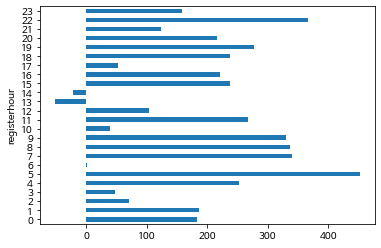

In [20]:
# 코드를 입력해 주세요
coin.groupby('registerhour')['pgamount'].mean().sort_values().plot(kind='barh')
plt.show()

## 북마크 정보

`bookmark.csv` 를 로드하여 `bookmark` 변수에 할당
- encoding 설정 (euc-kr)


**<font color='blue'>Tips.</font>** **인코딩(encoding)** 을 하는 이유는, 한글로 작성된 데이터에 대한 깨짐을 방지하기 위함입니다.  

In [21]:
# 데이터 파일의 저장 경로가 변경되어, 파일을 불러오는 코드는 미리 작성되어있습니다.
bookmark = pd.read_csv('/mnt/data/sk_wavve/wavve/bookmark_revised.csv', encoding='euc-kr')

In [22]:
show_column_desc(bookmark)

,uno,dates,hour,channeltype,programid,title,contentid,contentnumber,section,viewtime,devicetype
0,0000555c21e7942b8281c8068c2b5be0a628b8a1a3cbea...,20210308,20,V,C8201_C82000000146,주니토니 영어동요 AnimalSongs,C8201_C82000000146_01_0006.1,6,6.0,80,27
1,0000555c21e7942b8281c8068c2b5be0a628b8a1a3cbea...,20210328,18,V,C8401_C84000000071,종결혼개시연애,C8401_C84000000071_01_0009.1,9,9.0,210,4
2,0000660c47ef815351301bf15ec9bccb8deeb10083e3c8...,20210314,3,V,S01_P453505934,펜트하우스 2,S01_E454336055.1,8,1.0,3230,4
3,000d69d417701338f22d9f16e2f83a7a1765e7ee13ce67...,20210402,17,V,K02_T2020-1654,UHD 환경스페셜,K02_PS-2020204132-01-000.1,2,3.0,10,4
4,001c22742f8ddd59252f18774995d958e5a24ea4a1cb7c...,20210310,15,V,C6101_C61000000142,문호 스트레이독스 2기,C6101_C61000000142_01_0004.1,4,8.0,850,1


,column,desc
0,uno,user 식별값
1,dates,시청이 발생한 날짜
2,hour,NaN
3,channeltype,"콘텐츠 종류(V=방송, L=실시간 스트리밍, M=영화, E=기타)"
4,programid,channeltype이 \n-V인 경우 해당 프로그램 식별값 (참고-<1박2일 시즌...
5,title,channeltype이 \n-V인 경우 해당 프로그램 제목\n-M인 경우 해당 영화 제목
6,contentid,channeltype이 \n-V인 경우 해당 프로그램의 회차에 대한 식별값 (참고-...
7,contentnumber,channeltype이 \n-V인 경우 해당 프로그램의 회차에 대한 번호 혹은 제목
8,section,channeltype이 \n-V인 경우 해당 프로그램의 카테고리 정보. 코드 정의는...
9,viewtime,시청 시간. 초 단위


`bookmark` 크기 조회

In [23]:
# 코드를 입력해 주세요
bookmark.shape

(13676217, 11)

상위 5개 행 조회

In [24]:
# 코드를 입력해 주세요
bookmark.head()

,uno,dates,hour,channeltype,programid,title,contentid,contentnumber,section,viewtime,devicetype
0,0000555c21e7942b8281c8068c2b5be0a628b8a1a3cbea...,20210308,20,V,C8201_C82000000146,주니토니 영어동요 AnimalSongs,C8201_C82000000146_01_0006.1,6,6.0,80,27
1,0000555c21e7942b8281c8068c2b5be0a628b8a1a3cbea...,20210328,18,V,C8401_C84000000071,종결혼개시연애,C8401_C84000000071_01_0009.1,9,9.0,210,4
2,0000660c47ef815351301bf15ec9bccb8deeb10083e3c8...,20210314,3,V,S01_P453505934,펜트하우스 2,S01_E454336055.1,8,1.0,3230,4
3,000d69d417701338f22d9f16e2f83a7a1765e7ee13ce67...,20210402,17,V,K02_T2020-1654,UHD 환경스페셜,K02_PS-2020204132-01-000.1,2,3.0,10,4
4,001c22742f8ddd59252f18774995d958e5a24ea4a1cb7c...,20210310,15,V,C6101_C61000000142,문호 스트레이독스 2기,C6101_C61000000142_01_0004.1,4,8.0,850,1


북마크를 가장 많이 한 `title`(타이틀) 조회 (상위 20개 조회)

In [25]:
# 코드를 입력해 주세요
bookmark['title'].value_counts().head(20)

펜트하우스 2                  1303918
펜트하우스                     779465
런닝맨                       665642
무한도전                      336745
나 혼자 산다                   298896
놀면 뭐하니?                   211428
프렌즈                       158650
미운 우리 새끼                  143646
전지적 참견시점                  143034
일일드라마 미스 몬테크리스토           121498
그것이 알고싶다                  113947
백종원의 골목식당                 104266
거침없이 하이킥                  100411
1박2일 시즌4                   95078
꼬리에 꼬리를 무는 그날 이야기 시즌2      91800
전원일기                       91321
슈퍼맨이 돌아왔다                  87084
라디오스타                      86854
맛있는 녀석들                    79698
아내의 맛                      79437
Name: title, dtype: int64

가장 많이 북마크를 한 `devicetype`(디바이스 종류) 조회

In [26]:
# 코드를 입력해 주세요
bookmark['devicetype'].value_counts()

4     5184873
1     2260105
2     2224546
3     1107473
5      969158
32     554753
27     494739
7      429684
21     333606
12      65302
6       39954
72       7295
81       3944
31        717
73         68
Name: devicetype, dtype: int64

디바이스 종류 엑셀 파일(`column_code_info.xlsx`의 `device` 시트) 로드
- `device_type` 변수에 할당

In [27]:
# 코드를 입력해 주세요
device_type = pd.read_excel('/mnt/data/sk_wavve/wavve/column_code_info.xlsx', sheet_name='device')
device_type

,code,device type,description
0,1,pc,PC
1,2,ios,iPhone
2,3,ios,iPad
3,4,android,Android Phone
4,5,android,Android Tablet
5,6,smarttv,Samsung Orsay (12~15)
6,7,ott,OTT Device
7,8,mobile,Mobile Web
8,12,lgchplus,LG Channel Plus
9,13,ibb,IBB


`devicetype` 별 데이터 수 조회 후 별도의 데이터프레임으로 생성
- `bookmark_cnt` 에 할당

In [28]:
# 코드를 입력해 주세요
bookmark_cnt = bookmark['devicetype'].value_counts().reset_index()
bookmark_cnt.columns = ['code', 'count']
bookmark_cnt

,code,count
0,4,5184873
1,1,2260105
2,2,2224546
3,3,1107473
4,5,969158
5,32,554753
6,27,494739
7,7,429684
8,21,333606
9,12,65302


`device_type`과 `bookmark_cnt` 병합

**<font color='blue'>Tips.</font>** **병합**을 통해 두 개 이상의 데이터 프레임을 하나로 합칠 수 있습니다.

In [29]:
# 코드를 입력해 주세요
output = pd.merge(device_type, bookmark_cnt)
output

,code,device type,description,count
0,1,pc,PC,2260105
1,2,ios,iPhone,2224546
2,3,ios,iPad,1107473
3,4,android,Android Phone,5184873
4,5,android,Android Tablet,969158
5,6,smarttv,Samsung Orsay (12~15),39954
6,7,ott,OTT Device,429684
7,12,lgchplus,LG Channel Plus,65302
8,21,chromecast,Chromecast,333606
9,27,sstv,Samsung Tizen (15~),494739


`output`을 `count` 컬럼에 대한 내림차순 정렬

In [30]:
# 코드를 입력해 주세요
output.sort_values('count', ascending=False, ignore_index=False)

,code,device type,description,count
3,4,android,Android Phone,5184873
0,1,pc,PC,2260105
1,2,ios,iPhone,2224546
2,3,ios,iPad,1107473
4,5,android,Android Tablet,969158
11,32,lgtv,LG TV,554753
9,27,sstv,Samsung Tizen (15~),494739
6,7,ott,OTT Device,429684
8,21,chromecast,Chromecast,333606
7,12,lgchplus,LG Channel Plus,65302


## 컨텐츠 정보 

- `content_info.csv`를 로드하여 `content` 변수에 할당

In [31]:
# 데이터 파일의 저장 경로가 변경되어, 파일을 불러오는 코드는 미리 작성되어있습니다.
content = pd.read_csv('/mnt/data/sk_wavve/wavve/content_info.csv')

상위 5개의 행을 조회합니다.

In [32]:
# 코드를 입력해 주세요
content.head()

,contentid,playtime,title,preview,broaddate
0,A01_A00000000001_01_0001.1,1466.0,끝과 시작,어느 날 거리를 지나가다가 어떤 가게에서 틀어 놓은 배구 경기 중계 소리를 듣고 문...,2014-04-10
1,A01_A00000000001_01_0002.1,1470.0,카라스노 고교 배구부,히나타는 중학교 처음이자 마지막 공식 대회에서 참패를 안겨 준 ‘코트 위의 제왕’ ...,2014-04-17
2,A01_A00000000001_01_0003.1,1469.0,최강의 아군,배구부원으로서 정식으로 체육관에서 훈련할 수 있게 허락하는 것을 조건으로 다른 신입...,2014-04-24
3,A01_A00000000001_01_0004.1,1470.0,꼭대기의 경치,"드디어 3대3 대결이 시작되고, 히나타는 이젠 자기도 토스를 받을 수 있다는 생각에...",2014-05-01
4,A01_A00000000001_01_0005.1,1470.0,소심한 자의 긴장,카게야마의 자로 잰 듯 정확하게 올려 준 빠른 토스를 눈을 감고 스파이크를 때려서 ...,2014-05-08


행과 열의 정보를 조회합니다.

In [33]:
# 코드를 입력해 주세요
content.shape

(454323, 5)

데이터프레임의 컬럼별 정보를 조회합니다.

In [34]:
# 코드를 입력해 주세요
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454323 entries, 0 to 454322
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   contentid  454323 non-null  object
 1   playtime   346172 non-null  object
 2   title      431544 non-null  object
 3   preview    377943 non-null  object
 4   broaddate  453675 non-null  object
dtypes: object(5)
memory usage: 17.3+ MB


`playtime` 컬럼을 가져옵니다.

In [35]:
# 코드를 입력해 주세요
content['playtime']

0         1466.0
1         1470.0
2         1469.0
3         1470.0
4         1470.0
           ...  
454318    1548.0
454319    1634.0
454320    1655.0
454321    1577.0
454322    1543.0
Name: playtime, Length: 454323, dtype: object

`playtime` 컬럼을 수치형 타입(numeric type)으로 강제 변환을 시도합니다.


**<font color='blue'>Tips.</font>** **수치형**이란, **숫자 형태**로 측정되는 데이터를 뜻합니다. 수치형의 예시로는 시험성적, 키, 몸무게 등이 있습니다.

이와 반대로 **범주형**이란, 관측 결과가 **몇 개의 범주 또는 항목의 형태**로 나타나는 데이터를 뜻합니다. 범주형의 예시로는 성별, 혈액형, 지역 등이 있습니다.

In [36]:
# 코드를 입력해 주세요
pd.to_numeric(content['playtime'])

ValueError: Unable to parse string "01:07:31" at position 302375

변환되지 않는 오류를 확인합니다.

In [37]:
content.loc[302375]

contentid    M_1000392100275100000.1
playtime                    01:07:31
title           2013 순천만 국제정원박람회 개막식
preview                          NaN
broaddate                 2013-04-19
Name: 302375, dtype: object

In [38]:
print(content['playtime'][0])

1466.0


In [39]:
def convert(x):
    try:
        float(x)
    except Exception as e:
        print(f'error: {e}')

In [40]:
content['playtime'].apply(convert)

error: could not convert string to float: '01:07:31'
error: could not convert string to float: '00:46:55'
error: could not convert string to float: '00:40:49'
error: could not convert string to float: '00:40:45'
error: could not convert string to float: '00:34:54'
error: could not convert string to float: '00:41:14'
error: could not convert string to float: '00:40:45'
error: could not convert string to float: '00:40:25'
error: could not convert string to float: '00:35:53'
error: could not convert string to float: '01:03:25'
error: could not convert string to float: '00:46:02'
error: could not convert string to float: '00:45:25'
error: could not convert string to float: '00:50:49'
error: could not convert string to float: '00:43:09'
error: could not convert string to float: '00:25:22'
error: could not convert string to float: '00:23:49'
error: could not convert string to float: '00:24:23'
error: could not convert string to float: '00:52:59'
error: could not convert string to float: '01:

0         None
1         None
2         None
3         None
4         None
          ... 
454318    None
454319    None
454320    None
454321    None
454322    None
Name: playtime, Length: 454323, dtype: object

In [41]:
import datetime

datetime.datetime.fromtimestamp(1466.0).strftime('%H:%M:%S')

'00:24:26'

In [42]:
24 * 60 + 26

1466

In [43]:
def convert_time(x):
    try:
        x = float(x)
        ret = datetime.datetime.fromtimestamp(x).strftime('%H:%M:%S')
    except Exception as e:
        ret = x
    finally:
        return ret

`apply()`는 파이썬 함수를 컬럼에 일괄 적용합니다.

In [44]:
content['playtime'].apply(convert_time)

0         00:24:26
1         00:24:30
2         00:24:29
3         00:24:30
4         00:24:30
            ...   
454318    00:25:48
454319    00:27:14
454320    00:27:35
454321    00:26:17
454322    00:25:43
Name: playtime, Length: 454323, dtype: object

`apply()`를 적용한 결과물을 컬럼에 재대입합니다.

In [45]:
content['playtime'] = content['playtime'].apply(convert_time)
content['playtime']

0         00:24:26
1         00:24:30
2         00:24:29
3         00:24:30
4         00:24:30
            ...   
454318    00:25:48
454319    00:27:14
454320    00:27:35
454321    00:26:17
454322    00:25:43
Name: playtime, Length: 454323, dtype: object

`pd.to_timedelta()` 함수로 playtime의 전체 초(total_seconds)를 계산하기 위하여 변환합니다.

In [46]:
content['playtime'] = pd.to_timedelta(content['playtime'])

In [47]:
content['playtime_second'] = content['playtime'].dt.total_seconds()

In [48]:
content.head()

,contentid,playtime,title,preview,broaddate,playtime_second
0,A01_A00000000001_01_0001.1,0 days 00:24:26,끝과 시작,어느 날 거리를 지나가다가 어떤 가게에서 틀어 놓은 배구 경기 중계 소리를 듣고 문...,2014-04-10,1466.0
1,A01_A00000000001_01_0002.1,0 days 00:24:30,카라스노 고교 배구부,히나타는 중학교 처음이자 마지막 공식 대회에서 참패를 안겨 준 ‘코트 위의 제왕’ ...,2014-04-17,1470.0
2,A01_A00000000001_01_0003.1,0 days 00:24:29,최강의 아군,배구부원으로서 정식으로 체육관에서 훈련할 수 있게 허락하는 것을 조건으로 다른 신입...,2014-04-24,1469.0
3,A01_A00000000001_01_0004.1,0 days 00:24:30,꼭대기의 경치,"드디어 3대3 대결이 시작되고, 히나타는 이젠 자기도 토스를 받을 수 있다는 생각에...",2014-05-01,1470.0
4,A01_A00000000001_01_0005.1,0 days 00:24:30,소심한 자의 긴장,카게야마의 자로 잰 듯 정확하게 올려 준 빠른 토스를 눈을 감고 스파이크를 때려서 ...,2014-05-08,1470.0


분별 히스토그램 분포표 확인

**<font color='blue'>Tips.</font>** **히스토그램(histogram)** 이란, 도수 분포를 직사각형 형태의 기둥으로 나타낸 그래프를 뜻합니다.

**히스토그램**을 통해 각 계급에 속하는 자료의 수가 많고 적음을 한눈에 알아볼 수 있습니다.

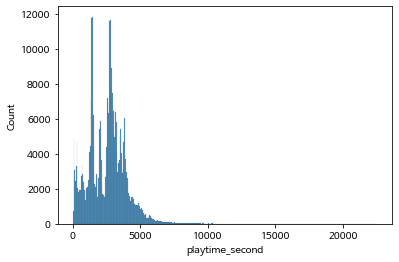

In [49]:
# 코드를 입력해 주세요
sns.histplot(content['playtime_second'])
plt.show()

평균 플레이타임 출력

In [50]:
# 코드를 입력해 주세요
content['playtime_second'].mean()

2554.9712830615995

`playtime_second`에 대한 통합 통계 산출

In [51]:
# 코드를 입력해 주세요
content['playtime_second'].agg(['min', 'max', 'median', 'mean'])

min           0.000000
max       22549.000000
median     2675.000000
mean       2554.971283
Name: playtime_second, dtype: float64

## Movie

`movie_info.csv` 데이터 로드
- `movie` 변수에 할당

In [52]:
# 데이터 파일의 저장 경로가 변경되어, 파일을 불러오는 코드는 미리 작성되어있습니다.
movie = pd.read_csv('/mnt/data/sk_wavve/wavve/movie_info.csv')

`movie` 상위 5개 행 조회

In [53]:
# 코드를 입력해 주세요
movie.head()

,movieid,title_ko,title_en,nation,director,actor,targetage,description,runningtime
0,MV_AE01_AE000000001,"전설의 가스펠 그룹, 클라크 시스터즈",The Clark Sisters: First Ladies of Gospel,미국,크리스틴 스완슨,"언자누 엘리스, 드모어 바네스, 레이븐 굿윈",15,역사상 가장 유명한 전설적인 가스펠 그룹 '클라크 시스터즈'의 극적인 음악 이야기가...,110
1,MV_AE01_AE000000002,카스틸 시리즈 1: 헤븐,VC Andrews' Heaven,미국,폴 샤피로,"애너리즈 바쏘, 줄리 벤즈",15,헤븐은 시골인 위너로에서도 오지에 사는 카스틸 가문의 장녀다.카스틸 가문은 마을에서...,88
2,MV_AE01_AE000000003,카스틸 시리즈 2: 천사의 그림자,VC Andrews' Dark Angel,미국,폴 샤피로,"애너리즈 바쏘, 제이슨 프리스틀리",15,외할머니 질리언과 의붓 외할아버지 토니의 집에서 살게 된 헤븐은 힘겹게 적응하며 다...,88
3,MV_AE01_AE000000004,카스틸 시리즈 3: 무너지는 가슴,VC Andrews' Fallen Hearts,미국,제이슨 프리스틀리,"애너리즈 바쏘, 제이슨 프리스틀리",15,교사가 되어 다시 위너로로 돌아온 헤븐은 첫사랑 로건과 가까운 사이로 발전한다. 하...,88
4,MV_AE01_AE000000005,카스틸 시리즈 4: 천국의 문,VC Andrews' Gates of Paradise,미국,게일 하비,"제이슨 프리스틀리, 조안나 뉴마치",15,"십여 년이 흘러 헤븐과 로건, 패니의 자녀들은 모두 예전의 그들 나이만큼 자랐다. ...",88


`nation`(국가별) `movieid`의 콘텐츠 수 내림차순 정렬

In [54]:
# 코드를 입력해 주세요
movie.groupby('nation')['movieid'].count().sort_values(ascending=False)

nation
한국                    7955
미국                    6253
일본                    6139
영국                     777
프랑스                    718
                      ... 
스웨덴, 핀란드, 이라크            1
스웨덴,덴마크                  1
스위스, 독일, 남아프리카 공화국       1
스위스, 미국                  1
힌극                       1
Name: movieid, Length: 954, dtype: int64

가장 많은 영화를 만든 감독 내림차순 정렬

In [55]:
# 코드를 입력해 주세요
movie.groupby('director')['movieid'].count().sort_values(ascending=False)

director
호두K         345
데이비드 김      129
스즈키 켄이치로    112
에릭           91
쿠모모          88
           ... 
사나다 키요시       1
사나유키          1
사노 카즈히로       1
사노킨타로우        1
힐러리안 뱅크스      1
Name: movieid, Length: 12171, dtype: int64

`runningtime`을 수치형(numeric) 컬럼으로 변환

In [56]:
# 코드를 입력해 주세요
pd.to_numeric(movie['runningtime'])

ValueError: Unable to parse string "169분" at position 20275

`pd.to_numeric()`을 활용하여 강제 변환
- errors='coerce' 적용

In [57]:
# 코드를 입력해 주세요
movie['runningtime'] = pd.to_numeric(movie['runningtime'], errors='coerce')

`runningtime` 에 대하여 히스토그램 분포를 확인합니다.

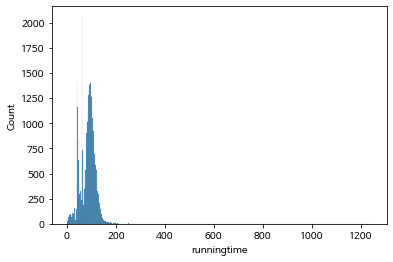

In [58]:
# 코드를 입력해 주세요
sns.histplot(movie['runningtime'])
plt.show()

`runningtime` 에 대하여 kde 플롯을 생성합니다.

**<font color='blue'>Tips.</font>** **커널 밀도 추정(KDE: Kernel Density Estimator)** 이란, 커널 함수와 데이터를 바탕으로 연속성 있는 확률 밀도 함수를 추정하는 방법을 뜻합니다. 

**kde plot**을 통해 데이터 분포를 직관적으로 나타낼 수 있습니다.

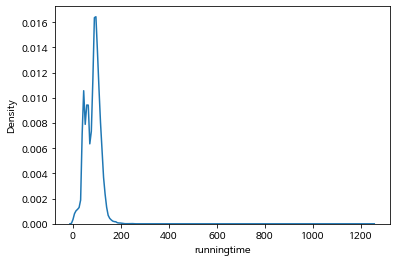

In [59]:
# 코드를 입력해 주세요
sns.kdeplot(movie['runningtime'])
plt.show()

다음의 국가별 ['한국', '미국', '일본', '영국', '프랑스', '홍콩', '중국', '캐나다', '독일', '스페인', '이탈리아'] 평균 `runningtime` 비교

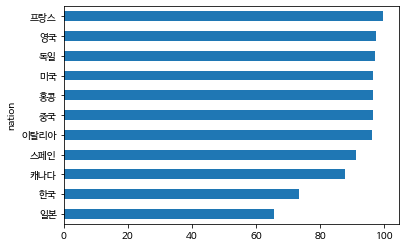

In [60]:
# 코드를 입력해 주세요
movie.loc[movie['nation'].isin(['한국', '미국', '일본', '영국', '프랑스', '홍콩', '중국', '캐나다', '독일', '스페인', '이탈리아'])].groupby('nation')['runningtime'].mean().sort_values().plot(kind='barh')
plt.show()

## Service

`service.csv` 파일 로드 후 `service` 변수에 할당

In [61]:
# 데이터 파일의 저장 경로가 변경되어, 파일을 불러오는 코드는 미리 작성되어있습니다.
service = pd.read_csv('/mnt/data/sk_wavve/wavve/service_revised.csv')

service의 크기 조회

In [62]:
# 코드를 입력해 주세요
service.shape

(89856, 15)

상위 5개 행 조회

In [63]:
# 코드를 입력해 주세요
service.head()

,uno,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Repurchase,devicetypeid,isauth,gender,agegroup,registerday,registerhour,endday
0,9c1c04380d3ec71c9ea55cb99ad803ab7c0037a3482b9b...,pk_1487,100.0,190,1.0,O,NaN,NaN,mobile,Y,F,20.0,2021-03-14,16,2021-04-14
1,b725d844efdb214963a6ccae004778d0fe40f8a0b5e901...,pk_1488,100.0,134,2.0,O,NaN,NaN,android,Y,M,35.0,2021-03-14,21,2021-04-14
2,7de6c80c6cb5c5098bbfef8d9da75dfdd338b681d96691...,pk_2025,100.0,151,1.0,O,NaN,NaN,android,Y,M,40.0,2021-03-14,10,2021-04-14
3,a5a209071166d24243bf47955ca91bb590a9d3bee46d71...,pk_1488,10900.0,190,2.0,NaN,NaN,O,android,N,M,40.0,2021-03-14,0,2021-04-14
4,7a6960912bebe03c6e4c770eb1aa91329c3497f18f90ca...,pk_1489,100.0,134,4.0,O,NaN,NaN,pc,Y,F,20.0,2021-03-14,20,2021-04-14


`productcode` 에 대한 데이터 분포를 확인합니다.

In [64]:
# 코드를 입력해 주세요
service['productcode'].value_counts()

pk_1487    33137
pk_1488    12420
pk_2025    11332
pk_1508    10886
pk_1489    10588
           ...  
pk_1100        1
pk_138         1
pk_115         1
pk_335         1
pk_1071        1
Name: productcode, Length: 93, dtype: int64

`column_code_info.xlsx` 중 `Productcode` 시트 로드 후 `column_code`에 할당

In [65]:
# 코드를 입력해 주세요
column_code = pd.read_excel('/mnt/data/sk_wavve/wavve/column_code_info.xlsx', sheet_name='Productcode')

In [66]:
column_code.head()

,Productcode,Productcode_name,description
0,pk_115,LIVE 이용권,[자동결제] 모바일 기기에서 LIVE 전채널 시청 가능
1,pk_116,LIVE 이용권,"[자동결제] 모바일, PC, 스마트TV에서 LIVE 시청 가능"
2,pk_117,LIVE 이용권,"[자동결제] 모바일, PC, 스마트TV에서 LIVE 초고화질 시청 가능"
3,pk_118,방송VOD 이용권,[자동결제] 모바일 기기에서 방송VOD 전체 시청 가능
4,pk_119,방송VOD 이용권,"[자동결제] 모바일, PC, 스마트TV에서 방송VOD 전체 시청 가능 (다운로드 불가)"


`service`와 `column_code` 병합 (병합시, 좌/우 `Productcode`/`productcode` 병합)

In [67]:
# 코드를 입력해 주세요
merged = pd.merge(service, column_code, left_on='productcode', right_on='Productcode', how='left').drop('Productcode', axis=1)
merged

,uno,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Repurchase,devicetypeid,isauth,gender,agegroup,registerday,registerhour,endday,Productcode_name,description
0,9c1c04380d3ec71c9ea55cb99ad803ab7c0037a3482b9b...,pk_1487,100.00,190,1.0,O,NaN,NaN,mobile,Y,F,20.0,2021-03-14,16,2021-04-14,Basic,"동시시청 1회선, HD 화질, 모바일+PC"
1,b725d844efdb214963a6ccae004778d0fe40f8a0b5e901...,pk_1488,100.00,134,2.0,O,NaN,NaN,android,Y,M,35.0,2021-03-14,21,2021-04-14,Standard,"동시시청 2회선, FHD 화질, 전체 디바이스"
2,7de6c80c6cb5c5098bbfef8d9da75dfdd338b681d96691...,pk_2025,100.00,151,1.0,O,NaN,NaN,android,Y,M,40.0,2021-03-14,10,2021-04-14,Basic (ONE store),"동시시청 1회선, HD 화질, 모바일+PC"
3,a5a209071166d24243bf47955ca91bb590a9d3bee46d71...,pk_1488,10900.00,190,2.0,NaN,NaN,O,android,N,M,40.0,2021-03-14,0,2021-04-14,Standard,"동시시청 2회선, FHD 화질, 전체 디바이스"
4,7a6960912bebe03c6e4c770eb1aa91329c3497f18f90ca...,pk_1489,100.00,134,4.0,O,NaN,NaN,pc,Y,F,20.0,2021-03-14,20,2021-04-14,Premium,"동시시청 4회선, FHD 이상 최상위 화질, 전체 디바이스"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89851,1f8ab90fc1ae5c226d1caa92c97e6d65021375fe2741b2...,pk_2026,100.00,151,2.0,O,NaN,NaN,android,Y,F,25.0,2021-03-02,1,2021-04-02,Standard (ONE store),"동시시청 2회선, FHD 화질, 전체 디바이스"
89852,58ea1be6de7c5b1af8b2395386b42f377c209c43f90493...,pk_1508,9.99,140,1.0,NaN,NaN,O,ios,N,N,40.0,2021-03-02,0,2021-04-03,Basic (iTunes),"동시시청 1명, HD 화질"
89853,5b14d5322d801571e42101d4d91642f8f7b52a4fcafc01...,pk_1494,13750.00,134,1.0,NaN,NaN,O,android,Y,F,20.0,2021-03-11,10,2021-04-11,Basic X Bugs 듣기,"동시접속 1명, HD 화질, 모바일+PC"
89854,d16d0809e827fc3fc676c3850686bef8b311145248d893...,pk_1489,13900.00,134,4.0,NaN,NaN,NaN,sstv,Y,M,25.0,2021-03-11,21,2021-04-11,Premium,"동시시청 4회선, FHD 이상 최상위 화질, 전체 디바이스"


`Productcode_name` 별 데이터 분포 확인

In [68]:
# 코드를 입력해 주세요
merged['Productcode_name'].value_counts()

Basic                                                          33137
Standard                                                       12422
Basic (ONE store)                                              11332
Basic (iTunes)                                                 10886
Premium                                                        10591
Standard (ONE store)                                            3032
Standard (iTunes)                                               2868
Premium (ONE store)                                             2732
Premium (iTunes)                                                1093
Basic X KB 나라사랑카드                                                548
방송(LIVE+VOD)+VOD 10회 다운로드 (iTunes)                               455
방송(LIVE+VOD)+VOD 10회 다운로드                                        235
Basic X KB 나라사랑카드 (ONE store)                                    163
Basic X Bugs 듣기                                                  124
방송VOD 이용권                         

`Productcode_name` 분포 시각화

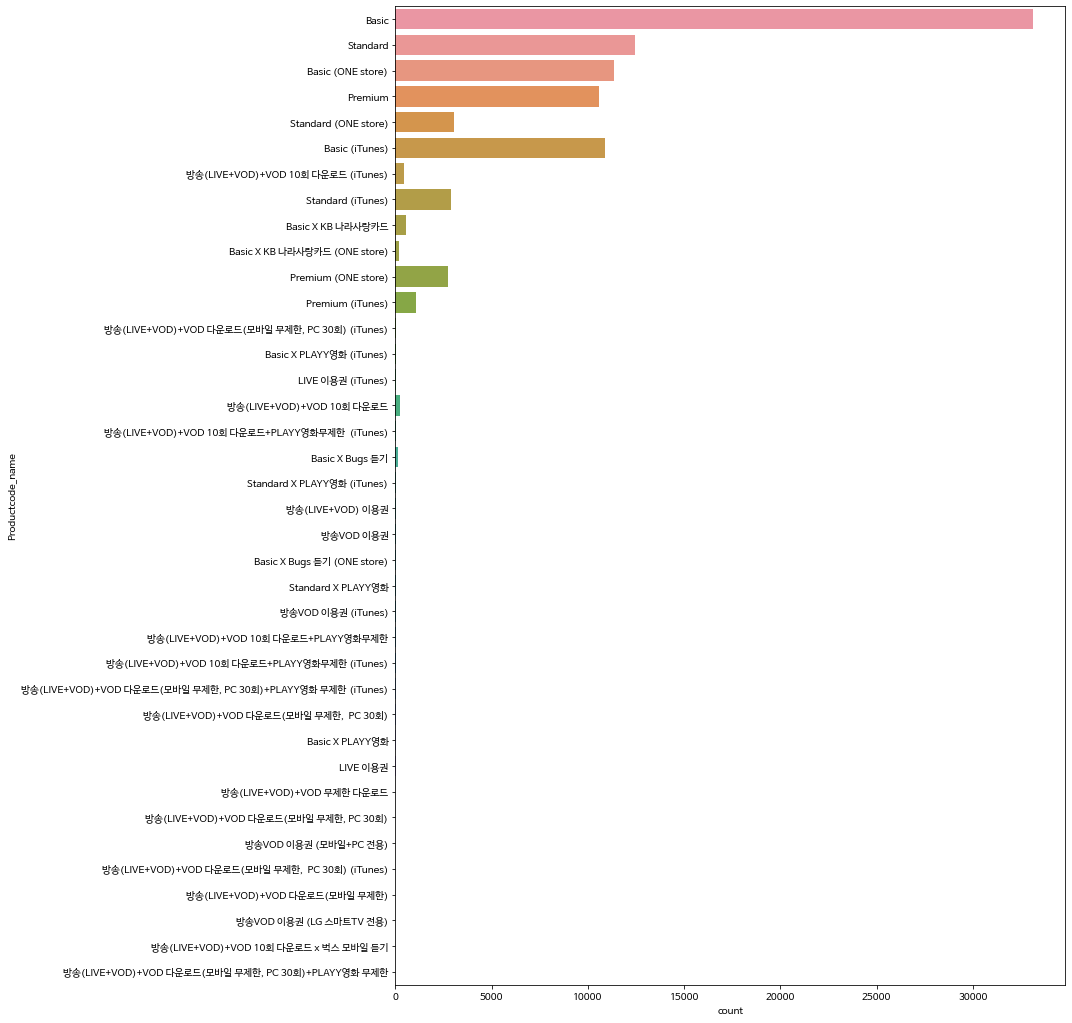

In [69]:
plt.figure(figsize=(12, 18))
sns.countplot(y='Productcode_name', data=merged)
plt.show()

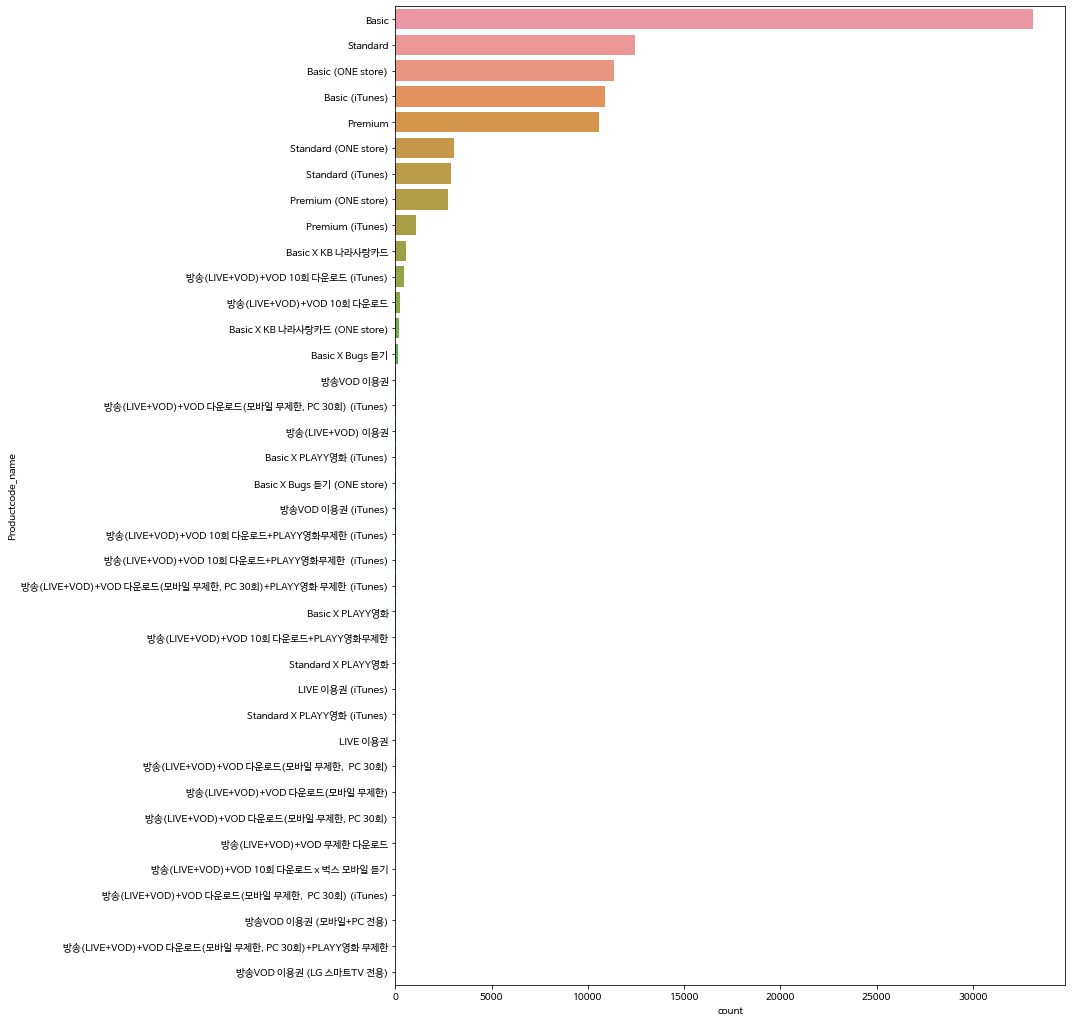

In [70]:
plt.figure(figsize=(12, 18))
sns.countplot(y='Productcode_name', data=merged, order=merged['Productcode_name'].value_counts().index)
plt.show()

`Basic` 상품 이용자만 필터링

In [71]:
# 코드를 입력해 주세요
cond = (merged['Productcode_name'] == 'Basic')
merged.loc[cond]

,uno,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Repurchase,devicetypeid,isauth,gender,agegroup,registerday,registerhour,endday,Productcode_name,description
0,9c1c04380d3ec71c9ea55cb99ad803ab7c0037a3482b9b...,pk_1487,100.0,190,1.0,O,NaN,NaN,mobile,Y,F,20.0,2021-03-14,16,2021-04-14,Basic,"동시시청 1회선, HD 화질, 모바일+PC"
6,0599f9c5a2f6182a78e43968a132435bf0a3d4262e5445...,pk_1487,7900.0,131,1.0,NaN,NaN,NaN,android,Y,M,20.0,2021-03-15,14,2021-04-15,Basic,"동시시청 1회선, HD 화질, 모바일+PC"
7,f6ed961a81a03500ec43ad9bd49b31943dffec57098203...,pk_1487,7900.0,134,1.0,NaN,NaN,O,android,N,N,40.0,2021-03-15,18,2021-04-15,Basic,"동시시청 1회선, HD 화질, 모바일+PC"
8,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,pk_1487,7900.0,134,1.0,NaN,NaN,NaN,android,Y,F,45.0,2021-03-09,16,2021-04-09,Basic,"동시시청 1회선, HD 화질, 모바일+PC"
9,4ec765db76545c1d6dda9f421590bf9d02f584009f8d92...,pk_1487,100.0,190,1.0,O,O,NaN,pc,Y,F,25.0,2021-03-09,14,2021-04-09,Basic,"동시시청 1회선, HD 화질, 모바일+PC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89840,a90331705d2a6b0c45e8dca785d4a3228921e2788d23ba...,pk_1487,100.0,134,1.0,O,NaN,O,android,Y,M,50.0,2021-03-10,12,2021-04-10,Basic,"동시시청 1회선, HD 화질, 모바일+PC"
89841,25e4b96a58ec3b4a177b85ba2acf8f63b45d8476f203c8...,pk_1487,100.0,132,1.0,O,NaN,O,android,Y,F,45.0,2021-03-10,14,2021-04-10,Basic,"동시시청 1회선, HD 화질, 모바일+PC"
89843,807539e6c4ed4fceafc901d13bfc9dba51c23b0a45b896...,pk_1487,7900.0,134,1.0,NaN,NaN,O,android,N,N,40.0,2021-03-10,1,2021-04-10,Basic,"동시시청 1회선, HD 화질, 모바일+PC"
89845,bdc01cf601631aacebb02791d7effb03e64bb58a5bab0b...,pk_1487,100.0,134,1.0,O,NaN,O,mobile,Y,F,30.0,2021-03-03,15,2021-04-03,Basic,"동시시청 1회선, HD 화질, 모바일+PC"


Basic 상품 사용자의 `devicetypeid` 분포 확인

In [72]:
# 코드를 입력해 주세요
merged.loc[cond, 'devicetypeid'].value_counts()

android        16280
pc              8971
mobile          7885
ssfamilyhub        1
Name: devicetypeid, dtype: int64

['Basic', 'Standard', 'Premium'] 사용자만 필터 후 `Productcode_name`, `gender` 별 `pgamount` 평균 계산 후 내림차순 정렬

In [73]:
# 코드를 입력해 주세요
merged.loc[merged['Productcode_name'].isin(['Basic', 'Standard', 'Premium'])].groupby(['Productcode_name', 'gender'])[['pgamount']].mean().sort_values('pgamount', ascending=False)

pgamount
Productcode_name gender              
Premium          N       13859.590044
Standard         N       10900.000000
Basic            N        7890.666135
Standard         F        5056.913956
                 M        4946.771879
Premium          M        3113.820951
Basic            M        2755.356220
                 F        2712.643761
Premium          F        2578.828746

다음의 피벗 테이블 생성
- value는 `pgamount`의 평균 값
- 생성된 테이블을 `tmp` 변수에 저장

**<font color='blue'>Tips.</font>** **피벗 테이블(pivot table)**은 커다란 표(예: 데이터베이스, 스프레드시트, 비즈니스 인텔리전스 프로그램 등)의 데이터를 요약하는 통계표입니다.

In [74]:
# 코드를 입력해 주세요
tmp = merged.loc[merged['Productcode_name'].isin(['Basic', 'Standard', 'Premium'])].pivot_table(index='gender', columns='Productcode_name', values='pgamount')
tmp

Productcode_name,Basic,Premium,Standard
gender,,,
F,2712.643761,2578.828746,5056.913956
M,2755.356220,3113.820951,4946.771879
N,7890.666135,13859.590044,10900.000000


`tmp` 피벗테이블을 히트맵 시각화

**<font color='blue'>Tips.</font>** **히트맵(heat map)** 이란, 데이터의 값을 **색상으로 변환**시켜 시각적인 분석을 가능하게 하는 데이터 시각화 기법의 하나입니다.

**히트맵**을 통해 구체적인 수치 없이도 많은 데이터가 시사하는 바를 효과적인 패턴으로 나타낼 수 있습니다. 

<AxesSubplot:xlabel='Productcode_name', ylabel='gender'>

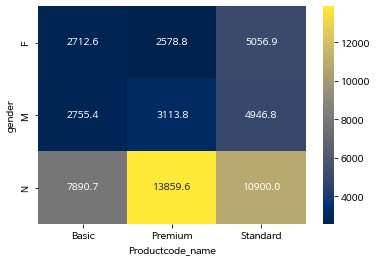

In [75]:
# 코드를 입력해 주세요
sns.heatmap(tmp, annot=True, fmt='.1f', cmap='cividis')

## 머신러닝을 활용한 재구매율(Repurchase) 예측

In [76]:
service['Repurchase'].value_counts()

O    59425
Name: Repurchase, dtype: int64

`target` 변수를 생성후 `Repurchase` 컬럼이 결측치가 아닌 경우 True, 결측치인 경우 False 대입

In [77]:
service['target'] = service['Repurchase'].notnull()
service['target'].value_counts()

True     59425
False    30431
Name: target, dtype: int64

`target` 변수를 int 타입으로 변경

In [78]:
service['target'] = service['target'].astype('int')

결측치에 대하여 일괄 `'X'`로 치환

In [79]:
service = service.fillna('X')

In [80]:
service.head()

,uno,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Repurchase,devicetypeid,isauth,gender,agegroup,registerday,registerhour,endday,target
0,9c1c04380d3ec71c9ea55cb99ad803ab7c0037a3482b9b...,pk_1487,100.0,190,1.0,O,X,X,mobile,Y,F,20.0,2021-03-14,16,2021-04-14,0
1,b725d844efdb214963a6ccae004778d0fe40f8a0b5e901...,pk_1488,100.0,134,2.0,O,X,X,android,Y,M,35.0,2021-03-14,21,2021-04-14,0
2,7de6c80c6cb5c5098bbfef8d9da75dfdd338b681d96691...,pk_2025,100.0,151,1.0,O,X,X,android,Y,M,40.0,2021-03-14,10,2021-04-14,0
3,a5a209071166d24243bf47955ca91bb590a9d3bee46d71...,pk_1488,10900.0,190,2.0,X,X,O,android,N,M,40.0,2021-03-14,0,2021-04-14,1
4,7a6960912bebe03c6e4c770eb1aa91329c3497f18f90ca...,pk_1489,100.0,134,4.0,O,X,X,pc,Y,F,20.0,2021-03-14,20,2021-04-14,0


`service` 데이터프레임의 컬럼 정보 확인

In [81]:
service.columns

Index(['uno', 'productcode', 'pgamount', 'chargetypeid',
       'concurrentwatchcount', 'promo_100', 'coinReceived', 'Repurchase',
       'devicetypeid', 'isauth', 'gender', 'agegroup', 'registerday',
       'registerhour', 'endday', 'target'],
      dtype='object')

## Feature(X) 정의

In [82]:
features = [
#     'uno', 
    'productcode', 
    'pgamount', 
    'chargetypeid',
    'concurrentwatchcount', 
    'promo_100', 
    'coinReceived', 
#     'Repurchase',
    'devicetypeid', 
    'isauth', 
    'gender', 
    'agegroup', 
#     'registerday',
    'registerhour', 
#     'endday', 
]

In [83]:
service[features].head()

,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,devicetypeid,isauth,gender,agegroup,registerhour
0,pk_1487,100.0,190,1.0,O,X,mobile,Y,F,20.0,16
1,pk_1488,100.0,134,2.0,O,X,android,Y,M,35.0,21
2,pk_2025,100.0,151,1.0,O,X,android,Y,M,40.0,10
3,pk_1488,10900.0,190,2.0,X,X,android,N,M,40.0,0
4,pk_1489,100.0,134,4.0,O,X,pc,Y,F,20.0,20


## X, Y 정의

In [84]:
x = pd.get_dummies(service[features])
y = service['target']

## 데이터셋 분할

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=123)

## 머신러닝 모델 생성

**<font color='blue'>Tips.</font>** **머신러닝(machine learning)** 이란, **경험적 데이터를 기반으로 학습을 하고 예측을 수행**하고 스스로의 성능을 향상시키는 시스템과 이를 위한 알고리즘을 연구하고 구축하는 기술입니다.

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
model = RandomForestClassifier(random_state=123)
model.fit(x_train, y_train)
pred = model.predict(x_test)

예측 정확도 산출

In [88]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.6430558646783886

In [89]:
pd.DataFrame(list(zip(x_train.columns, model.feature_importances_)), columns=['feature', 'importance']).sort_values('importance', ascending=False)

,feature,importance
2,registerhour,5.199085e-01
1,chargetypeid,1.261195e-01
117,isauth_X,3.159144e-02
0,pgamount,2.412640e-02
127,agegroup_20.0,1.791343e-02
...,...,...
35,productcode_pk_120,1.553304e-06
23,productcode_pk_115,1.302852e-06
7,productcode_pk_1075,1.042175e-06
41,productcode_pk_126,9.466422e-07


## 개선: 데이터 전처리

**<font color='blue'>Tips.</font>** **데이터 전처리** 란, 원자료(raw data)를 **데이터 분석 목적과 방법에 맞는 형태**로 처리하기 위하여 불필요한 정보를 분리 제거하고 가공하기 위한 예비적인 조작을 뜻합니다.

데이터를 어떻게 전처리하냐는 머신러닝 모델의 성능에 영향을 미칠 수 있습니다.  

`devicetypeid` 전처리

In [90]:
service['devicetypeid'].value_counts()

android        41812
pc             17283
ios            15416
mobile         13805
lgtv             732
sstv             457
ott              307
smarttv           26
lgchplus          16
ott_cjhello        1
ssfamilyhub        1
Name: devicetypeid, dtype: int64

In [91]:
def convert_device(x):
    if x == 'pc':
        return 0
    elif x in ['android', 'ios', 'mobile']:
        return 1
    else:
        return 2
    
service['devicetypeid'] = service['devicetypeid'].apply(convert_device)
service['devicetypeid'].value_counts()

1    71033
0    17283
2     1540
Name: devicetypeid, dtype: int64

`productcode` 전처리

In [92]:
service['productcode'].value_counts()[:10]

pk_1487    33137
pk_1488    12420
pk_2025    11332
pk_1508    10886
pk_1489    10588
pk_2026     3032
pk_1506     2866
pk_2027     2732
pk_1507     1093
pk_2005      547
Name: productcode, dtype: int64

In [93]:
service['productcode'] = service['productcode'].apply(lambda x: x if x in ['pk_1487', 'pk_1488', 'pk_2025', 'pk_1508', 'pk_1480'] else 'other')
service['productcode'].value_counts()

pk_1487    33137
other      22081
pk_1488    12420
pk_2025    11332
pk_1508    10886
Name: productcode, dtype: int64

`chargetypeid` 전처리

In [94]:
service['chargetypeid'].value_counts()[:10]

134    22448
151    17279
140    15416
131     9472
132     8962
180     8274
190     6954
170     1034
121       13
160        4
Name: chargetypeid, dtype: int64

In [95]:
service['chargetypeid'] = service['chargetypeid'].apply(lambda x: 'other' if x in [170, 121, 160] else x)
service['chargetypeid'].value_counts()

134      22448
151      17279
140      15416
131       9472
132       8962
180       8274
190       6954
other     1051
Name: chargetypeid, dtype: int64

## 데이터셋 분할 후 재 학습하여 성능 평가 (64% -> 68%)

In [96]:
x = pd.get_dummies(service[features])
y = service['target']

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=123)

In [98]:
model = RandomForestClassifier(random_state=123, n_estimators=300, max_depth=5)
model.fit(x_train, y_train)
pred = model.predict(x_test)

데이터 추가 전처리 후 개선된 정확도 확인

In [99]:
accuracy_score(y_test, pred)

0.6801691520142443

지금까지 Python을 활용한 데이터 분석, 그리고 더 나아가 머신러닝 모델도 적용해보았습니다. 

어떠신가요? 데이터 분석 과정에서의 Python의 강력함이 느껴지지 않으신가요? 

본 과정에서는 데이터 분석을 위한 Python 기초 문법을 중점적으로 학습했고, 

해당 자료를 통해 학습한 문법을 활용하는 예시를 SK Wavve 실제 데이터를 활용하여 체험해보았습니다.